In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from os.path import join
from numpy.random import choice
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist  # load mnist dataset
(x_train, y_train), (_, y_test) = mnist.load_data()

In [3]:
y_train.shape

(60000,)

In [4]:
def generate_index_tr(y, n_tr, rep):
    """ y, array of training outputs,
        n_tr, number of training samples,
        rep, number of repetitions
    """
    classes = np.sort(np.unique(y))
    c = classes.size
    list_id_classes = [np.squeeze(np.argwhere(y==y_val_)) 
                       for y_val_ in classes]
    id_all_classes = np.zeros((rep, c*n_tr), dtype=int)
    for r_ in range(rep):
        for id_class_, ll_ in enumerate(list_id_classes):
            idx_tr = choice(ll_, size=n_tr, replace=False)  # uniformly
            id_all_classes[r_, id_class_*n_tr:(id_class_+1)*n_tr] = idx_tr
    return id_all_classes

9329


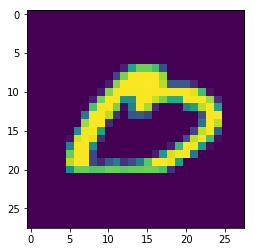

15864


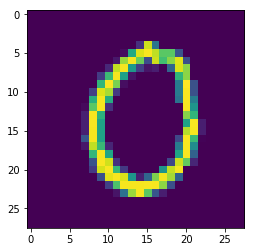

51061


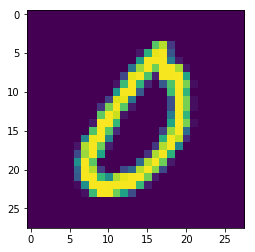

6783


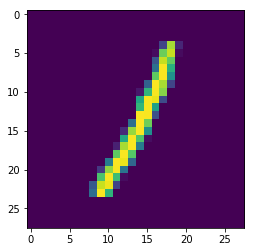

18116


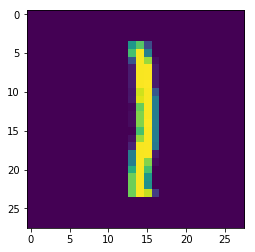

11857


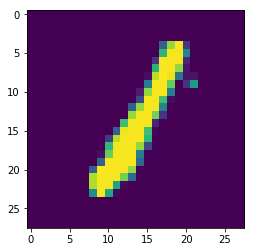

8983


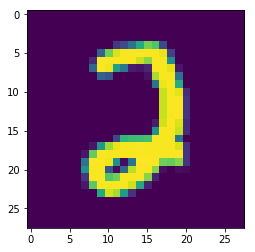

4230


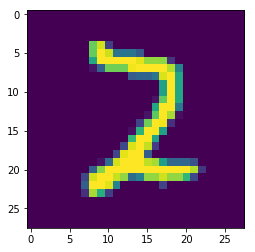

55952


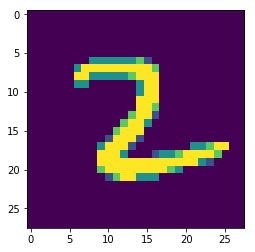

57391


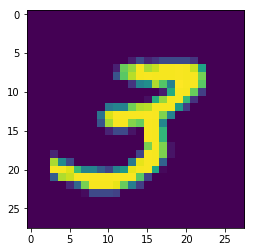

14087


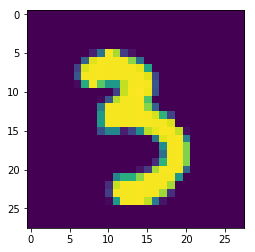

52327


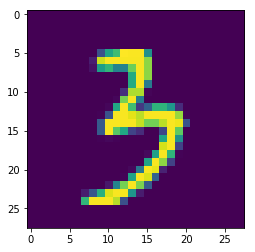

42139


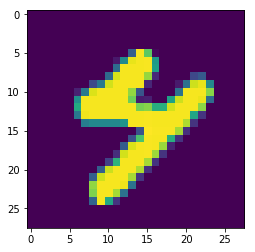

54187


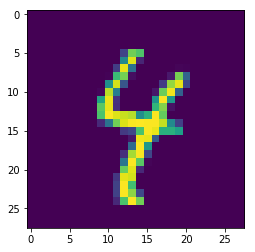

20680


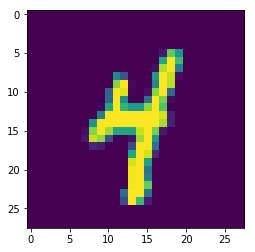

55325


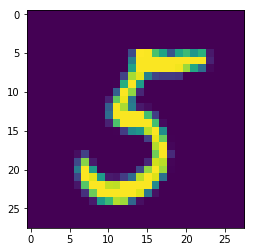

56306


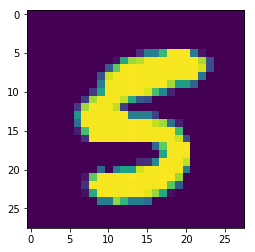

8414


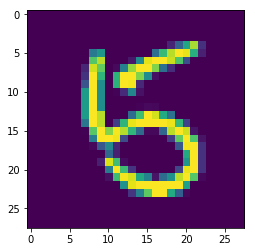

30063


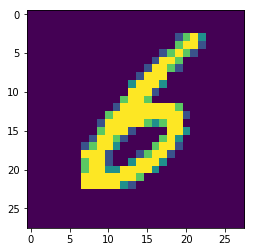

15004


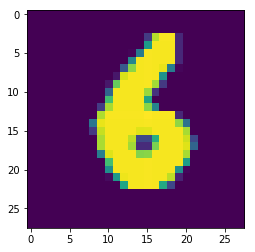

53198


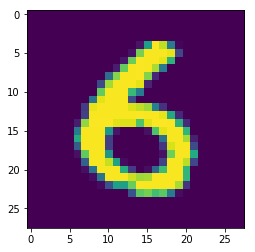

53839


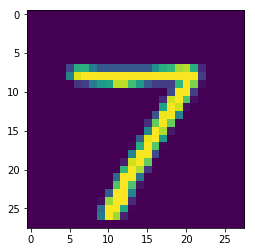

17703


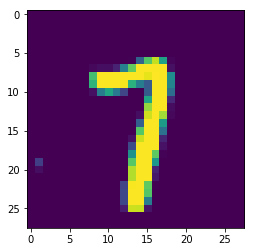

42959


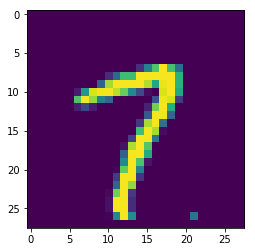

48973


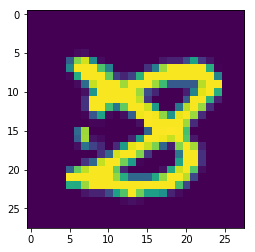

57335


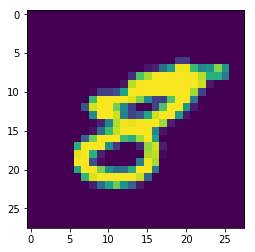

7300


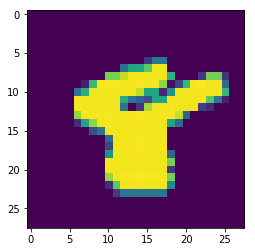

41395


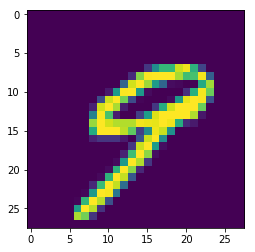

5806


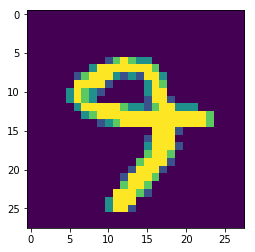

35593


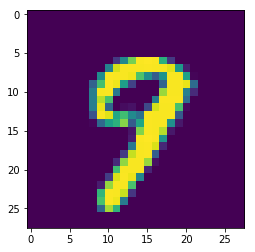

In [6]:
for id_ in id_all[0]:
    print(id_)
    plt.imshow(x_train[id_, :, :])
    plt.show()
    plt.close()

In [57]:
def generate_index_tr_vl(y, n_tr, rep, n_vl=30000):
    """ y, array of training outputs,
        n_tr, number of training samples,
        rep, number of repetitions
    """
    classes = np.sort(np.unique(y))
    c = classes.size
    list_id_classes = [np.squeeze(np.argwhere(y==y_val_)) 
                       for y_val_ in classes]
    id_tr = np.zeros((rep, c*n_tr), dtype=int)
    id_vl = np.zeros((rep, c*n_vl), dtype=int)
    
    for r_ in range(rep):
        for id_class_, ll_ in enumerate(list_id_classes):
            tmp_id_tr = choice(ll_, size=n_tr, replace=False)  # uniformly
            id_tr[r_, id_class_*n_tr:(id_class_+1)*n_tr] = tmp_id_tr
            
            # int(n_vl/c), validation samples per class
            tmp_id_vl = choice(np.setdiff1d(ll_, tmp_id_tr), # the order matters
                               size=int(n_vl/c), replace=False)
            id_vl[r_, id_class_*int(n_vl/c):(id_class_+1)*int(n_vl/c)] = tmp_id_vl
            
    return id_tr, id_vl

In [58]:
id_tr, id_vl = generate_index_tr_vl(y_train, n_tr=2, rep=2)

52114


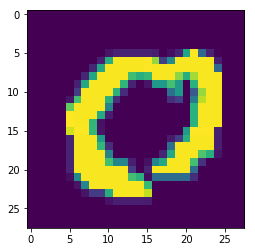

51186


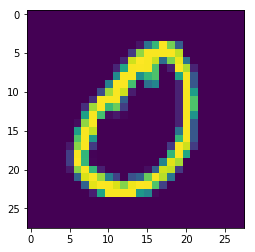

20465


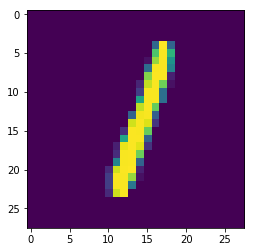

25569


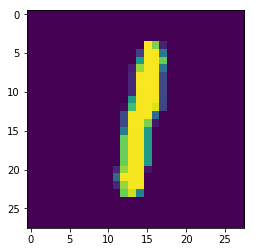

42754


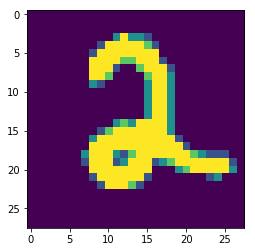

25804


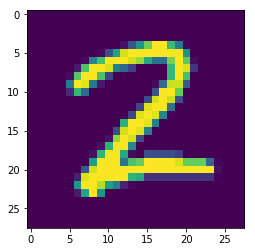

13836


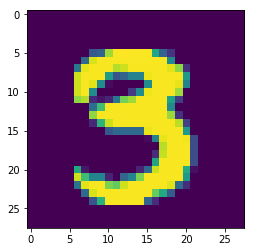

24435


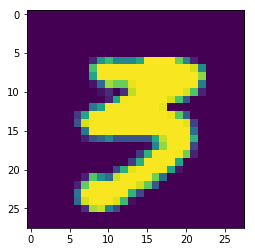

38984


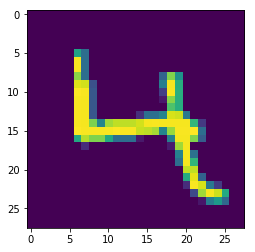

10912


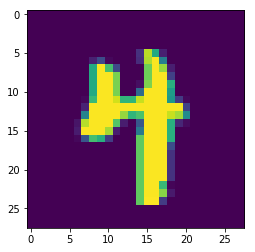

21782


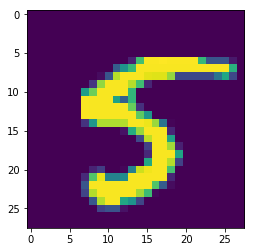

24490


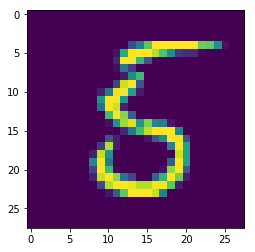

26470


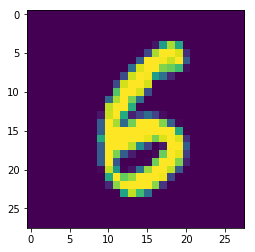

47524


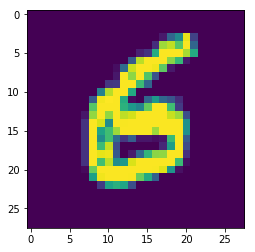

43956


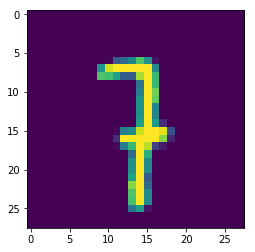

23782


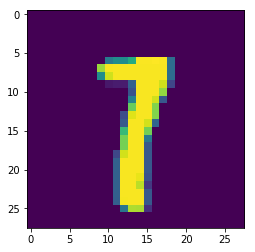

19826


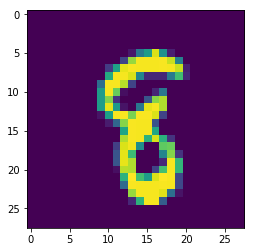

30999


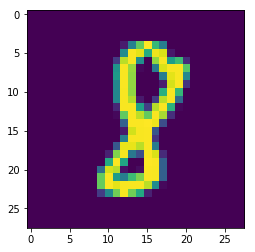

6061


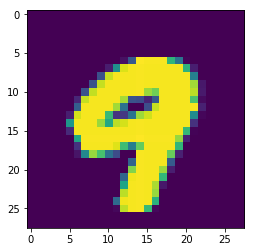

17758


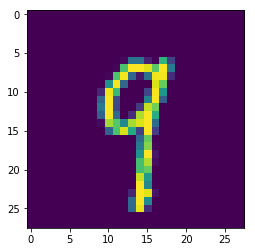

In [50]:
for id_ in id_vl[0]:
    print(id_)
    plt.imshow(x_train[id_, :, :])
    plt.show()
    plt.close()

1495


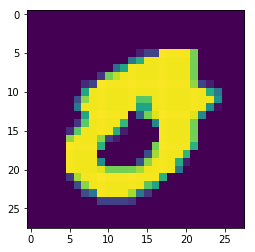

10645


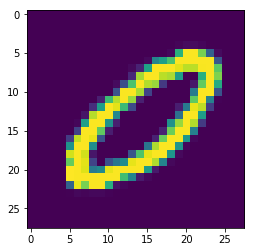

51377


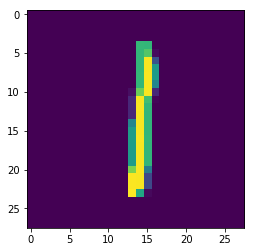

35657


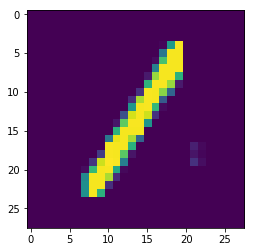

30369


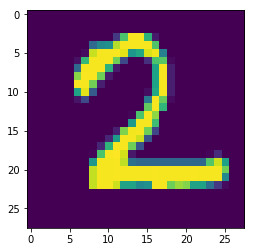

30811


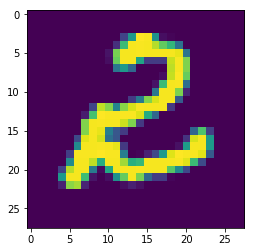

33054


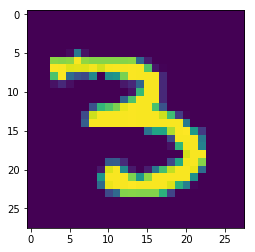

18679


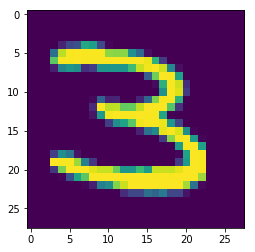

33306


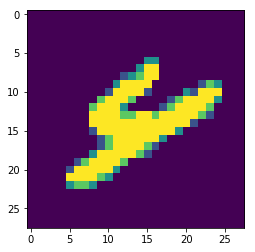

34991


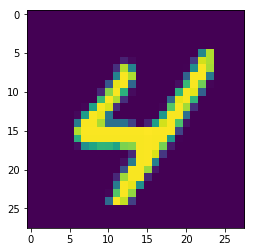

287


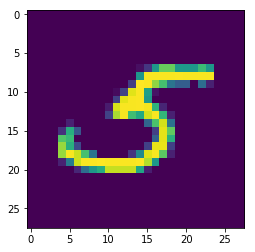

10798


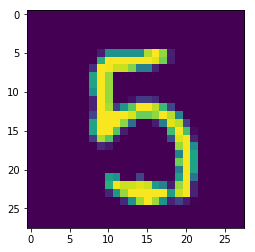

43320


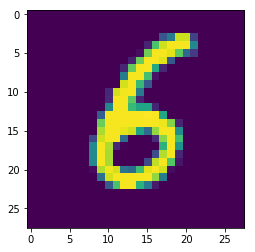

28170


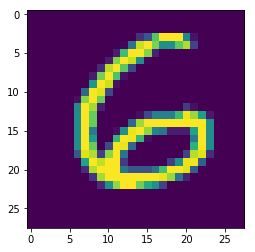

33656


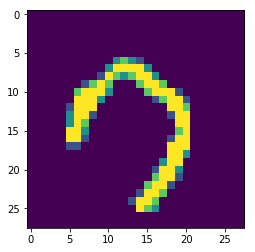

20032


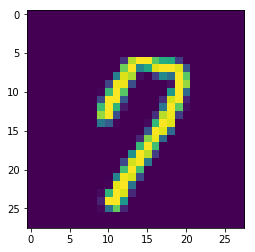

34510


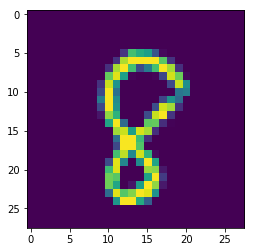

50001


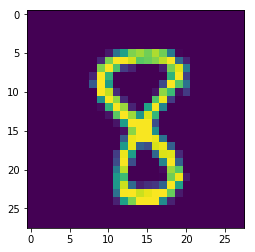

32304


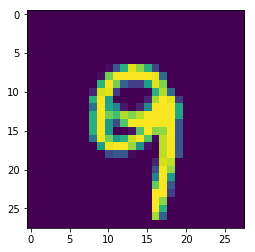

58159


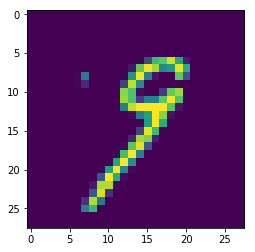

In [51]:
for id_ in id_tr[0]:
    print(id_)
    plt.imshow(x_train[id_, :, :])
    plt.show()
    plt.close()